#Setup



<font color="red">Caso apareça um botão como esse durante o setup, deve ser necessário reiniciar o "Runtime"</font>


Pode ser feito clicando no botão ou pelo menu do Colab.

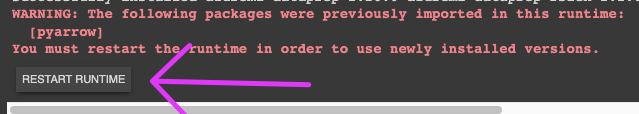

In [1]:
!git clone https://github.com/elthonf/mlops2025.git

Cloning into 'mlops2025'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 96 (delta 34), reused 78 (delta 20), pack-reused 0 (from 0)
Receiving objects: 100% (96/96), 4.01 MiB | 9.89 MiB/s, done.
Resolving deltas: 100% (34/34), done.


Equaliza o ambiente de desenvolvimento

In [2]:
!pip install -r mlops2025/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 944.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
  Attempting uninstall: pandas
    Found existing installation: pandas

Também precisaremos de bibliotecas específicas da plataforma Azure

In [1]:
!pip install -r mlops2025/requirements_azure.txt

  Using cached azureml_core-1.59.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached azureml_defaults-1.59.0-py3-none-any.whl.metadata (732 bytes)
  Using cached azureml_mlflow-1.59.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached azureml_telemetry-1.59.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached backports.tempfile-1.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached pathspec-0.12.1-py3-none-any.whl.metadata (21 kB)
  Using cached msal-1.32.0-py3-none-any.whl.metadata (11 kB)
  Using cached msal_extensions-1.3.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached knack-0.12.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached azure_core-1.32.0-py3-none-any.whl.metadata (39 kB)
  Using cached pkginfo-1.12.1.2-py3-none-any.whl.metadata (13 kB)
  Using cached argcomplete-3.6.1-py3-none-any.whl.metadata (16 kB)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl.metadata (9.2 kB)
  Using cached paramiko-3.5.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached azure_mgmt_reso

In [2]:
!mkdir modelo
!mkdir modelo/ambiente
!mkdir dadostreino
!pip list > modelo/ambiente/bibliotecas.txt
!pip freeze > modelo/ambiente/requirements.txt
!python --version > modelo/ambiente/python_version.txt

mkdir: cannot create directory ‘modelo’: File exists
mkdir: cannot create directory ‘modelo/ambiente’: File exists
mkdir: cannot create directory ‘dadostreino’: File exists


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay, classification_report
import sys, math, random, json, sklearn, joblib, uuid, os
from azureml.core import Experiment, Workspace, Dataset, Model
from mlops2025.datasets.describefunctions import *

In [4]:
sklearn.__version__

'1.5.2'

# Conexão com ML Studio

In [22]:
#Trocar os códigos abaixo pelos da sua instância!
subscription_id = '992dde24-6ee6-4885-af1e-da8e59ee20e1'
resource_group = 'mlops_9dts_'
workspace_name = 'mlops_9dts'

workspace = Workspace(subscription_id, resource_group, workspace_name)

# Carga de dados
Inclui métricas dos dados / metadados

In [23]:
dataset_name, dataset_version = 'Risco-De-Credito', None
try:
  dataset = Dataset.get_by_name(workspace, name=dataset_name)
  dataset_version = dataset.version
  mydf = dataset.to_pandas_dataframe()
  display( mydf.head() )
except:
  print("Dataset não encontrado")

{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}


,nome,renda,idade,etnia,sexo,casapropria,outrasrendas,estadocivil,escolaridade,default
0,"Simon, Rodriguez",4472.190323,42.036031,0,0,1,0,0,3,0
1,"Daniel, Castro",4592.774312,48.230662,1,0,1,0,1,2,0
2,"Myhue, Lin",2486.538807,56.881709,0,1,0,0,0,0,1
3,"Destiny, Richardson-Pacheco",2852.340117,51.684021,1,1,0,0,0,2,1
4,"Brittany, Cohen-Wilson",4703.782812,50.729078,1,1,1,0,1,2,0


In [24]:
# Neste exemplo, estamos registrando o artefato inteiro no AzureML
mydf.to_csv("./dadostreino/original_data.csv")

In [25]:
mydf_metadata = describe(mydf)
#mydf_metadata.to_json("./dadostreino/metadata.json", indent=4, orient='index')
mydf_metadata.to_markdown("./dadostreino/metadata.md")
mydf_metadata.to_csv("./dadostreino/metadata.csv")
mydf_metadata.to_excel("./dadostreino/metadata.xlsx")
mydf_metadata

,count,unique,top,freq,mean,std,min,10%,20%,25%,...,40%,50%,60%,70%,75%,80%,90%,max,dtypes,nunique
nome,100000,96546,"Andrew, Nguyen",10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,96546
renda,100000.0,NaN,NaN,NaN,3549.511518,804.766033,1008.14707,2433.267828,2847.749606,2999.406891,...,3345.294497,3553.223201,3764.81879,4003.569725,4143.017046,4292.027575,4641.554209,5727.149211,float64,100000
idade,100000.0,NaN,NaN,NaN,38.819483,11.330192,18.00046,22.506054,28.118952,30.203688,...,35.500646,38.829486,42.125037,45.451067,47.23245,49.19211,54.128594,81.859679,float64,100000
etnia,100000.0,NaN,NaN,NaN,0.4766,0.499455,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,int64,2
sexo,100000.0,NaN,NaN,NaN,0.47714,0.49948,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,int64,2
casapropria,100000.0,NaN,NaN,NaN,0.4744,0.499347,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,int64,2
outrasrendas,100000.0,NaN,NaN,NaN,0.23312,0.42282,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,int64,2
estadocivil,100000.0,NaN,NaN,NaN,0.58106,0.493388,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,int64,2
escolaridade,100000.0,NaN,NaN,NaN,1.72235,0.87798,0.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,int64,4
default,100000.0,NaN,NaN,NaN,0.45068,0.497564,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,int64,2


In [26]:
# gera arquivo de quantidade por classes (veja o arquivo gerado em ./dadostreino/classes.json)
mycounts = describe_cols(mydf, mydf_metadata)

with open('./dadostreino/classes.json', 'w', encoding='utf-8') as f:
    json.dump(mycounts, f, ensure_ascii=False, indent=4, cls=NpEncoder)

# Preparação dos dados

Identifica no dataset as variáveis independentes e a variavel alvo

In [27]:
targetcol = 'default'
y = mydf[targetcol]

independentcols = ['renda', 'idade', 'etnia', 'sexo', 'casapropria', 'outrasrendas', 'estadocivil', 'escolaridade']
X = mydf[independentcols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

Cria experimento

In [28]:
experiment = Experiment(workspace=workspace, name="Experimento_MLStudio")

# Treinamento do modelo 01 (Classificador)

Cria uma execução para o experimento

In [29]:
myrunid = str(uuid.uuid1())
run = experiment.start_logging(run_id=myrunid,
                               display_name=f"My Run {myrunid} feito em aula",
                               outputs="modelo",
                               snapshot_directory="dadostreino")
run.log("Tipo", "Classificador")

In [30]:

clf = rfc(n_estimators=10, max_depth=5)
clf.fit(X=X_train[independentcols], y=y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

Avaliações e Logs

In [31]:
clf_acuracia = clf.score(X=X_test[independentcols], y=y_test)
print(f"Modelo 01 (classificador), criado com acurácia de: [{clf_acuracia}]")
run.log("acuracia", clf_acuracia)

Modelo 01 (classificador), criado com acurácia de: [0.8665]


In [32]:
#Demais logs (não serão comparados)
run.log("language", "python")
run.log("python", sys.version)
run.log("Versao sklearn", sklearn.__version__)
run.log("criterion", clf.criterion)
run.log("n_estimators", clf.n_estimators)
run.log("min_samples_leaf", clf.min_samples_leaf)
run.log("max_depth",  str(clf.max_depth))
run.log("dataset_name",  dataset_name)
run.log("dataset_version",  dataset_version)
run.log_list("Inputs", independentcols)
run.log_list("classes", [int(v) for v in clf.classes_])

'Matriz de confusão do modelo:'

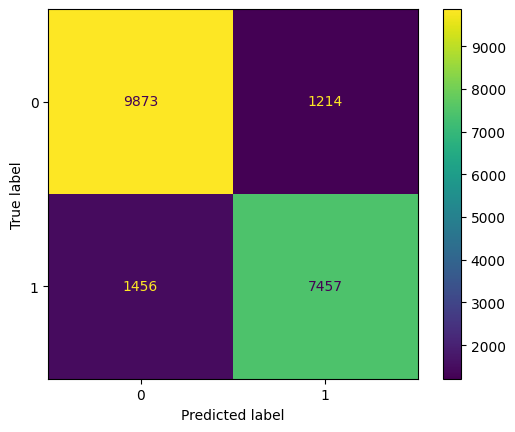

In [33]:
#Exibe Matriz de confusão e loga na Azure
display(f"Matriz de confusão do modelo:")
cfg_matrix = ConfusionMatrixDisplay.from_estimator(clf, X_test[independentcols], y_test).figure_
run.log_image("confusion_matrix", plot=cfg_matrix)

In [34]:
#Exibe Classification Report e grava em arquivo
c_report = classification_report(y_test, clf.predict(X_test[independentcols]))
print(f"Classification Report:\n{c_report}")
with open("modelo/classification_report.txt", "w") as text_file:
    text_file.write(c_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     11087
           1       0.86      0.84      0.85      8913

    accuracy                           0.87     20000
   macro avg       0.87      0.86      0.86     20000
weighted avg       0.87      0.87      0.87     20000



Exportar o(s) binário(s) do modelo

Dica: Após a exportação, é possível consultar o modelo e demais artefatos pelo explorador de arquivos. Faça isso antes de continuar.

In [35]:
#Exportar o(s) binário(s) do modelo
model_name = "modelo_bin.pkl"
binaryname = "modelo/" + model_name
joblib.dump(value=clf, filename=binaryname)
run.log("model_binary", binaryname)

Finaliza o experimento e apaga arquivos temporários.  
Obs.: Pode demorar alguns segundos/minutos para os arquivos da pasta "modelo" aparecerem no Azure ML Studio.

In [36]:
#Finaliza o experimento e apaga arquivos temporários.
run.complete()
run.wait_for_completion()
os.remove(binaryname) # Arquivo binário do modelo
os.remove("modelo/classification_report.txt") # Arquivo binário do modelo

# Atividade 1 : Análise na Azure

Crie n modelos em experimentos para nosso problema de risco de crédito, e envie para a Azure. Em seguida, compare os resultados dentro da plataforma Azure.  

Cada experimento deve ter seus parâmetros alterados conforme vetores.  
Observe que o nomes dos parâmetros são respectivamente n_estimators, max_depth e min_samples_leaf.

|n_estimators|max_depth|min_samples_leaf|
|---|---|---|
|1|1|8|
|3|4|3|
|5|None|
|10|

Obs.:  
n = 4 $\times$ 3 $\times$ 2 = 24

In [37]:
experiment = Experiment(workspace=workspace, name="Experimento_RiscoCredito")

In [3]:
lst_n_estimators = [1, 3, 5, 8]
lst_max_depth = [1, 4, None]
lst_min_samples_leaf = [8, 3]

In [38]:
# prompt: # prompt: Atividade - Criar diversos modelos em experimentos para
# # avaliação com variações nos hyper-parâmetros.
# # – Os hyper-parâmetros a serem alterados são respectivamente:
# # – n_estimators: [1, 3, 5, 8]
# # – max_depth: [1, 4, None]
# # – min_samples_leaf: [8, 3]
# # • Crie n execuções no experimento, e envie para a Azure.
# # – Obs.: n = 4 × 3 × 2 = 24 variações
# use o itertools import product

from itertools import product

for n_estimators, max_depth, min_samples_leaf in product(lst_n_estimators, lst_max_depth, lst_min_samples_leaf):
    # Cria uma execução para o experimento
    myrunid = str(uuid.uuid1())
    run = experiment.start_logging(run_id=myrunid,
                                   display_name=f"n_estimators={n_estimators}, max_depth={max_depth}, min_samples_leaf={min_samples_leaf}",
                                   outputs="modelo",
                                   snapshot_directory="dadostreino")
    run.log("Tipo", "Classificador")

    clf = rfc(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    clf.fit(X=X_train[independentcols], y=y_train)

    # Avaliações e Logs
    clf_acuracia = clf.score(X=X_test[independentcols], y=y_test)
    print(f"Modelo criado com n_estimators={n_estimators}, max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, acurácia de: [{clf_acuracia}]")
    run.log("acuracia", clf_acuracia)
    run.log("n_estimators", n_estimators)
    run.log("max_depth", str(max_depth))
    run.log("min_samples_leaf", min_samples_leaf)

    # ... (restante do código para logging, matriz de confusão, classification report, etc.)

    # Exportar o(s) binário(s) do modelo
    model_name = f"modelo_bin_{myrunid}.pkl" # Use um nome de arquivo único para cada execução
    binaryname = "modelo/" + model_name
    joblib.dump(value=clf, filename=binaryname)
    run.log("model_binary", binaryname)

    # Finaliza a execução
    run.complete()
    run.wait_for_completion()
    os.remove(binaryname)


Modelo criado com n_estimators=1, max_depth=1, min_samples_leaf=8, acurácia de: [0.74035]
Modelo criado com n_estimators=1, max_depth=1, min_samples_leaf=3, acurácia de: [0.74035]
Modelo criado com n_estimators=1, max_depth=4, min_samples_leaf=8, acurácia de: [0.81415]
Modelo criado com n_estimators=1, max_depth=4, min_samples_leaf=3, acurácia de: [0.8103]
Modelo criado com n_estimators=1, max_depth=None, min_samples_leaf=8, acurácia de: [0.8556]
Modelo criado com n_estimators=1, max_depth=None, min_samples_leaf=3, acurácia de: [0.8302]
Modelo criado com n_estimators=3, max_depth=1, min_samples_leaf=8, acurácia de: [0.68865]
Modelo criado com n_estimators=3, max_depth=1, min_samples_leaf=3, acurácia de: [0.78175]
Modelo criado com n_estimators=3, max_depth=4, min_samples_leaf=8, acurácia de: [0.8552]
Modelo criado com n_estimators=3, max_depth=4, min_samples_leaf=3, acurácia de: [0.8346]
Modelo criado com n_estimators=3, max_depth=None, min_samples_leaf=8, acurácia de: [0.869]
Modelo c